In [1]:
from pickle import load
import numpy as np

In [101]:
path = '../bayes_implicit_solvent/rjmc_experiments/elaborate_tree_rjmc_march29_run_n_compounds=315_n_iter=100000_gaussian_ll_small_proposals.pkl'

In [102]:
with open(path, 'rb') as f:
    gaussian_trees = load(f)[1:]

In [103]:
t = gaussian_trees[0]

In [104]:
len(gaussian_trees)

4000

In [105]:
discrete_trees = [tuple(t.ordered_nodes) for t in gaussian_trees]

In [106]:
len(set(discrete_trees))

25

In [107]:
events = [discrete_trees[i] != discrete_trees[i + 1] for i in range(len(discrete_trees) - 1)]

In [108]:
sum(events)

37

In [109]:
gaussian_trees[-1]

*                             (r = 1.96 Å, s = 0.78)
|-[#1]                        (r = 0.59 Å, s = 0.63)
|-[#6]                        (r = 1.86 Å, s = 0.87)
  |-[#6&r0]                   (r = 1.76 Å, s = 0.95)
    |-[#6&r0&H0]              (r = 1.84 Å, s = 0.65)
      |-[#6&r0&H0&X4]         (r = 2.05 Å, s = 0.69)
      |-[#6&r0&H0&X2]         (r = 1.89 Å, s = 0.65)
|-[#7]                        (r = 1.83 Å, s = 0.86)
  |-[#7&X2]                   (r = 1.87 Å, s = 0.99)
    |-[#7&X2&r0]              (r = 2.31 Å, s = 0.99)
|-[#8]                        (r = 1.10 Å, s = 0.83)
  |-[#8&+0]                   (r = 1.54 Å, s = 1.00)
    |-[#8&+0&H0]              (r = 2.31 Å, s = 0.93)
      |-[#8&+0&H0&X2]         (r = 1.69 Å, s = 1.14)
        |-[#8&+0&H0&X2&r0]    (r = 2.06 Å, s = 0.83)
|-[#9]                        (r = 2.64 Å, s = 0.56)
|-[#15]                       (r = 2.30 Å, s = 0.69)
|-[#16]                       (r = 2.57 Å, s = 0.72)
  |-[#16&X1]                  (r = 2.72 Å, s =

In [111]:
path = '../bayes_implicit_solvent/rjmc_experiments/elaborate_tree_rjmc_march29_run_n_compounds=315_n_iter=100000_student-t_ll_small_proposals.pkl'

In [112]:
with open(path, 'rb') as f:
    student_t_trees = load(f)[1:]

In [113]:
len(student_t_trees)

4000

In [114]:
discrete_trees_t = [tuple(t.ordered_nodes) for t in student_t_trees]
len(set(discrete_trees_t))

22

In [115]:
events = [discrete_trees_t[i] != discrete_trees_t[i + 1] for i in range(len(discrete_trees_t) - 1)]
sum(events)

37

In [116]:
student_t_trees[-1], gaussian_trees[-1]

(*                        (r = 0.86 Å, s = 0.89)
 |-[#1]                   (r = 0.61 Å, s = 0.72)
 |-[#6]                   (r = 1.73 Å, s = 0.96)
   |-[#6&X3]              (r = 1.90 Å, s = 0.83)
     |-[#6&X3&r0]         (r = 1.82 Å, s = 0.84)
 |-[#7]                   (r = 1.92 Å, s = 0.88)
   |-[#7&A]               (r = 1.84 Å, s = 0.85)
 |-[#8]                   (r = 1.20 Å, s = 1.02)
   |-[#8&+0]              (r = 1.62 Å, s = 0.94)
     |-[#8&+0&H0]         (r = 1.94 Å, s = 0.84)
       |-[#8&+0&H0&X1]    (r = 2.14 Å, s = 1.01)
 |-[#9]                   (r = 2.38 Å, s = 0.64)
 |-[#15]                  (r = 2.04 Å, s = 0.63)
 |-[#16]                  (r = 2.85 Å, s = 0.60)
   |-[#16&X2]             (r = 2.13 Å, s = 0.91)
 |-[#17]                  (r = 1.51 Å, s = 1.47)
 |-[#35]                  (r = 1.79 Å, s = 1.28)
 |-[#53]                  (r = 2.45 Å, s = 0.63),
 *                             (r = 1.96 Å, s = 0.78)
 |-[#1]                        (r = 0.59 Å, s = 0.63)
 |-[#6]  

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
def get_n_types_traj(trees):
    return np.array([t.number_of_nodes for t in trees])

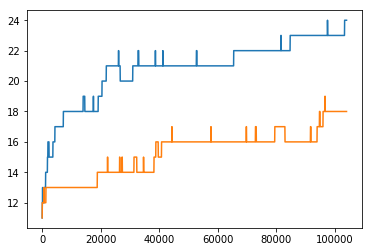

In [120]:
x_iterations = np.arange(len(gaussian_trees)) * 26
plt.plot(x_iterations, get_n_types_traj(gaussian_trees))
plt.plot(x_iterations, get_n_types_traj(student_t_trees))

In [121]:
import networkx as nx

def get_tree_depth(tree):
    return max(nx.shortest_path_length(tree.G, source='*').values())

def get_depth_traj(trees):
    return np.array(list(map(get_tree_depth, trees)))

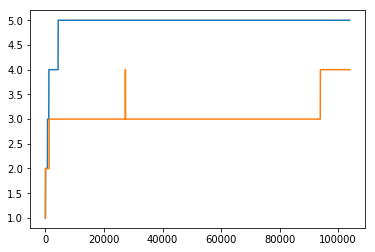

In [122]:
plt.plot(x_iterations, get_depth_traj(gaussian_trees))
plt.plot(x_iterations, get_depth_traj(student_t_trees))

In [123]:
import numpy as np
from bayes_implicit_solvent.molecule import Molecule
from simtk import unit


def sample_path_to_unitted_snapshots(path_to_npy_samples):
    xyz = np.load(path_to_npy_samples)
    traj = [snapshot * unit.nanometer for snapshot in xyz]
    return traj


from glob import glob
from pkg_resources import resource_filename

path_to_vacuum_samples = resource_filename('bayes_implicit_solvent',
                                           'vacuum_samples/vacuum_samples_*.npy')
paths_to_samples = glob(path_to_vacuum_samples)
#np.random.seed(0)
#np.random.shuffle(paths_to_samples)
#paths_to_samples = paths_to_samples[::2]

print('number of molecules being considered: {}'.format(len(paths_to_samples)))


def extract_cid_key(path):
    i = path.find('mobley_')
    j = path.find('.npy')
    return path[i:j]


cids = list(map(extract_cid_key, paths_to_samples))
print('first few CIDs', cids[:5])

mols = []

n_configuration_samples = 50

from bayes_implicit_solvent.freesolv import cid_to_smiles

from bayes_implicit_solvent.constants import beta
def unreduce(value):
    """Input value is in units of kB T, turn it into units of kilocalorie_per_mole"""
    return value / (beta * unit.kilocalorie_per_mole)

for path in paths_to_samples:
    cid = extract_cid_key(path)
    smiles = cid_to_smiles[cid]
    vacuum_samples = sample_path_to_unitted_snapshots(path)
    thinning = int(len(vacuum_samples) / n_configuration_samples)
    mol = Molecule(smiles, vacuum_samples=vacuum_samples[::thinning])

    if (unreduce(mol.experimental_value) > -15) and (unreduce(mol.experimental_value) < 5):
        mols.append(mol)
    else:
        print('discarding {} ({}) because its free energy was outside of the range [-15, +5] kcal/mol'.format(smiles, cid))
        
from jax import jit, vmap
from bayes_implicit_solvent.gb_models.jax_gb_models import compute_OBC_energy_vectorized
from bayes_implicit_solvent.solvation_free_energy import kj_mol_to_kT, one_sided_exp

@jit
def predict_solvation_free_energy_jax(theta, distance_matrices, charges, element_ind_array):
    N = int(len(theta) / 2)
    radii_, scaling_factors_ = theta[:N], theta[N:]

    radii = radii_[element_ind_array]
    scaling_factors = scaling_factors_[element_ind_array]

    @jit
    def compute_component(distance_matrix):
        return compute_OBC_energy_vectorized(distance_matrix, radii, scaling_factors, charges)

    W_F = vmap(compute_component)(distance_matrices)

    w_F = W_F * kj_mol_to_kT
    return one_sided_exp(w_F)

distance_matrices = [mol.distance_matrices for mol in mols]
charges = [mol.charges for mol in mols]


expt_means = unreduce(np.array([mol.experimental_value for mol in mols]))
expt_uncs = unreduce(np.array([mol.experimental_uncertainty for mol in mols]))

number of molecules being considered: 642
first few CIDs ['mobley_3210206', 'mobley_3589456', 'mobley_1107178', 'mobley_5200358', 'mobley_1781152']
discarding c1c(c(=O)[nH]c(=O)[nH]1)C(F)(F)F (mobley_7794077) because its free energy was outside of the range [-15, +5] kcal/mol
discarding c1c(c(=O)[nH]c(=O)[nH]1)F (mobley_337666) because its free energy was outside of the range [-15, +5] kcal/mol
discarding c1c(=O)[nH]c(=O)[nH]c1Cl (mobley_4338603) because its free energy was outside of the range [-15, +5] kcal/mol
discarding C([C@H]([C@H]([C@@H]([C@@H](CO)O)O)O)O)O (mobley_4587267) because its free energy was outside of the range [-15, +5] kcal/mol
discarding c1ccc(cc1)n2c(=O)c(c(cn2)N)Cl (mobley_2523689) because its free energy was outside of the range [-15, +5] kcal/mol
discarding c1c(c(=O)[nH]c(=O)[nH]1)Cl (mobley_9557440) because its free energy was outside of the range [-15, +5] kcal/mol
discarding c1c(c(=O)[nH]c(=O)[nH]1)I (mobley_2727678) because its free energy was outside of th

In [124]:
oemols = [mol.mol for mol in mols]

In [125]:
# just apply the unique trees!

In [126]:
from tqdm import tqdm
gaussian_typings = {}
for t in tqdm(gaussian_trees):
    tu = tuple(t.ordered_nodes)
    if tu not in gaussian_typings:
        gaussian_typings[tu] = t.apply_to_molecule_list(oemols)

100%|██████████| 4000/4000 [00:42<00:00, 93.35it/s]


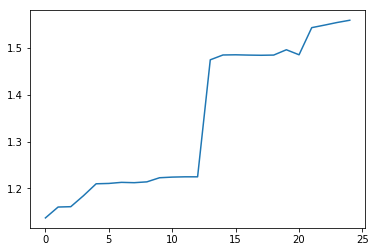

In [127]:
from scipy.stats import entropy
plt.plot([entropy(np.bincount(np.hstack(ty))[1:]) for ty in gaussian_typings.values()])

In [128]:
t_typings = {}
for t in tqdm(student_t_trees):
    tu = tuple(t.ordered_nodes)
    if tu not in t_typings:
        t_typings[tu] = t.apply_to_molecule_list(oemols)

100%|██████████| 4000/4000 [00:33<00:00, 120.56it/s]


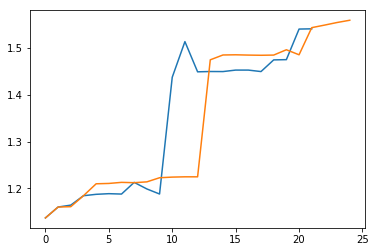

In [129]:
plt.plot([entropy(np.bincount(np.hstack(ty))[1:]) for ty in t_typings.values()])
plt.plot([entropy(np.bincount(np.hstack(ty))[1:]) for ty in gaussian_typings.values()])

In [130]:
len(set(discrete_trees).intersection(set(discrete_trees_t)))

3

In [131]:
t.assign_radii(oemols[0])

Quantity(value=array([0.17253617, 0.17253617, 0.06139225, 0.17253617, 0.1936307 ,
       0.18442392, 0.12016356, 0.12016356, 0.1936307 , 0.18442392,
       0.12016356, 0.12016356, 0.06139225, 0.06139225, 0.06139225,
       0.06139225, 0.06139225]), unit=nanometer)

In [58]:
def get_theta(tree):
    return np.hstack([tree.get_radii(), tree.get_scale_factors()])

In [34]:
def get_predictions(theta, typings):
    return np.array([predict_solvation_free_energy_jax(theta, distance_matrices[i], charges[i], typings[i]) for i in range(len(charges))])



# Get a prediction trajectory, and make a movie!

In [200]:
gaussian_trajs_concat = np.load('../bayes_implicit_solvent/rjmc_experiments/elaborate_tree_rjmc_march29_run_n_compounds=315_n_iter=100000_gaussian_ll_small_proposals.npz')['within_model_trajs']
student_t_trajs_concat = np.load('../bayes_implicit_solvent/rjmc_experiments/elaborate_tree_rjmc_march29_run_n_compounds=315_n_iter=100000_student-t_ll_small_proposals.npz')['within_model_trajs']


In [201]:
len(set([tuple(t) for t in gaussian_trajs_concat]))

37315

In [202]:
len(gaussian_trajs_concat) /4000

26.0

In [203]:
gaussian_trajs = [gaussian_trajs_concat[26*i:26*(i+1)] for i in range(len(gaussian_trees))]
student_t_trajs = [student_t_trajs_concat[26*i:26*(i+1)] for i in range(len(student_t_trees))]

In [204]:
gaussian_thetas = [traj[-1] for traj in gaussian_trajs]
student_t_thetas = [traj[-1] for traj in student_t_trajs]

In [205]:
set([len(t) for t in gaussian_trajs]), set([len(t) for t in student_t_trajs])

({26}, {26})

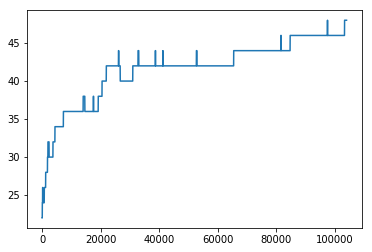

In [137]:
plt.plot([len(t) for t in gaussian_trajs_concat])

In [138]:
N_s_continuous = np.array([int(len(t)/2) for t in gaussian_trajs_concat])
len(N_s_continuous)

104000

In [139]:
26 * (len(gaussian_trees))

104000

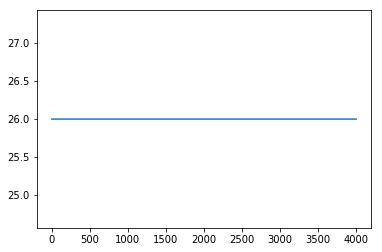

In [140]:
plt.plot([len(t) for t in gaussian_trajs])

In [141]:
len(N_s_continuous)

104000

In [142]:
len(N_s_continuous)

104000

In [143]:
okay_inds = []
problem_inds = []
for i in tqdm(range(len(gaussian_trees))):
    n_continuous = N_s_continuous[i * 26]
    n_discrete = len(gaussian_trees[i].ordered_nodes)
    if n_continuous == n_discrete:
        okay_inds.append(i)
    else:
        problem_inds.append(i)

100%|██████████| 4000/4000 [00:00<00:00, 742979.32it/s]


In [144]:
len(problem_inds)

0

[array([11, 11,  1, 11, 23,  3,  4,  4, 23,  3,  4,  4,  1,  1,  1,  1,  1]),
 array([11, 23, 20, 11,  8, 23, 11, 23, 11,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1]),
 array([11, 11, 10,  1,  1,  1,  1,  1]),
 array([11, 20, 11, 11, 17, 23, 16, 18,  3, 11, 19, 11,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1]),
 array([11, 20, 11, 11, 16, 18, 23, 11,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1]),
 array([11, 11, 23,  6, 14, 23, 11, 11, 23,  2,  2,  2, 12,  2, 12, 11, 11,
        11, 11,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1]),
 array([ 2,  2,  2,  2,  2,  2, 20,  5,  5,  5, 20,  5,  5,  5,  1,  1,  1,
         1]),
 array([11, 11, 11, 18,  1,  1,  1,  1,  1,  1]),
 array([11, 11,  1,  1,  1,  1,  1,  1]),
 array([11, 11,  1, 11, 11, 23,  3,  4,  4, 23,  3,  4,  4,  1,  1,  1,  1,
         1,  1,  1]),
 array([11,  2,  1,  2,  2,  2,  1,  2,  1,  2, 13, 11, 11, 11,  1,  1,  1,
         1,  1,  1, 

In [150]:
preds = get_predictions(
    gaussian_thetas[-1],
    gaussian_typings[tuple(gaussian_trees[-1].ordered_nodes)])

In [151]:
def rmse(x, y):
    return np.sqrt(np.mean((x - y)**2))

In [152]:
rmse(preds, expt_means)

1.8094774824574047

In [88]:
gaussian_trajs[0][0]

array([0.15      , 0.06597002, 0.17384848, 0.16261159, 0.16663971,
       0.27500468, 0.18953871, 0.24621566, 0.15795924, 0.17926987,
       0.25868332, 0.8       , 0.64642206, 0.87533219, 0.97683573,
       0.83096256, 0.63202198, 0.67355931, 0.80857691, 1.37918713,
       0.98735107, 0.73669832])

In [89]:
gaussian_trees[0]

*          (r = 1.50 Å, s = 0.80)
|-[#1]     (r = 0.66 Å, s = 0.65)
|-[#6]     (r = 1.75 Å, s = 0.88)
|-[#7]     (r = 1.63 Å, s = 0.98)
|-[#8]     (r = 1.67 Å, s = 0.83)
|-[#9]     (r = 2.74 Å, s = 0.63)
|-[#15]    (r = 1.89 Å, s = 0.67)
|-[#16]    (r = 2.47 Å, s = 0.81)
|-[#17]    (r = 1.57 Å, s = 1.38)
|-[#35]    (r = 1.79 Å, s = 0.99)
|-[#53]    (r = 2.58 Å, s = 0.73)

In [175]:
gaussian_prediction_traj = []
for i in tqdm(range(len(gaussian_trees))[::5]):
    gaussian_prediction_traj.append(get_predictions(
        gaussian_thetas[i],
        gaussian_typings[tuple(gaussian_trees[i].ordered_nodes)]))

100%|██████████| 800/800 [08:52<00:00,  1.42it/s]


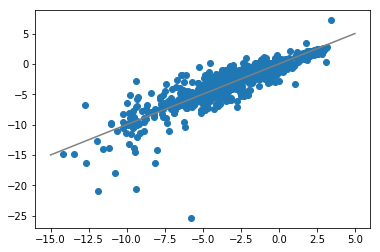

In [176]:
diag = np.linspace(-15,5)
plt.scatter(expt_means, gaussian_prediction_traj[-1])
plt.plot(diag, diag, c='grey')

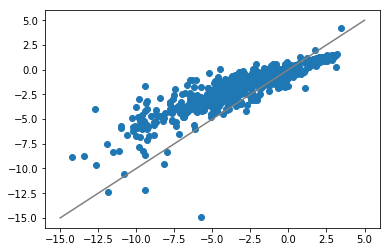

In [177]:
diag = np.linspace(-15,5)
plt.scatter(expt_means, unreduced_gaussian_prediction_traj[-1])
plt.plot(diag, diag, c='grey')

In [178]:
# oh, that's not good -- I had accidentally fit to a likelihood that was defined in terms of kcal/mol quantity minus unitless quantity...



In [179]:
unreduced_gaussian_prediction_traj = unreduce(np.array(gaussian_prediction_traj))

In [180]:
len(set([tuple(p) for p in unreduced_gaussian_prediction_traj]))

800

In [181]:
len(set([tuple(t.get_radii()) for t in gaussian_trees]))

42

In [182]:
np.save('march29_gaussian_ll_rjmc_prediction_traj.npy', unreduced_gaussian_prediction_traj)

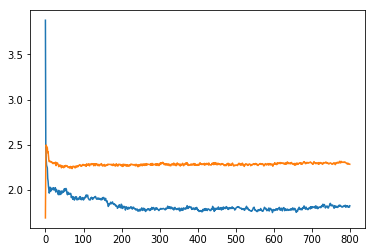

In [183]:
plt.plot([rmse(p, expt_means) for p in gaussian_prediction_traj])
plt.plot([rmse(p, expt_means) for p in unreduced_gaussian_prediction_traj])

In [184]:
rmse(unreduced_gaussian_prediction_traj[-1], expt_means)

2.2839381161986534

In [185]:
rmse(gaussian_prediction_traj[-1], expt_means)

1.8248480062636654

In [186]:
train_inds = np.array([  1,   2,   3,   5,   6,   8,  10,  13,  16,  17,  18,  20,  21,
        22,  23,  24,  28,  32,  33,  36,  37,  39,  41,  43,  44,  46,
        48,  49,  51,  52,  54,  56,  57,  62,  64,  66,  68,  70,  73,
        79,  82,  83,  84,  85,  92,  94,  97, 100, 101, 104, 105, 107,
       109, 110, 111, 115, 117, 118, 119, 120, 121, 122, 123, 126, 129,
       131, 132, 138, 139, 142, 143, 144, 145, 146, 151, 152, 154, 156,
       157, 159, 162, 163, 164, 166, 172, 173, 175, 176, 177, 183, 184,
       187, 188, 190, 195, 196, 199, 200, 201, 204, 205, 208, 214, 215,
       216, 223, 226, 227, 229, 230, 232, 233, 238, 239, 240, 243, 244,
       245, 246, 254, 255, 262, 263, 264, 266, 267, 270, 271, 273, 274,
       275, 277, 278, 279, 289, 290, 291, 292, 295, 296, 298, 299, 301,
       302, 303, 304, 305, 306, 307, 308, 311, 312, 319, 320, 321, 322,
       324, 326, 328, 329, 333, 336, 337, 340, 341, 342, 345, 346, 347,
       351, 353, 354, 357, 359, 360, 363, 366, 367, 369, 371, 374, 376,
       379, 380, 382, 386, 391, 392, 393, 394, 395, 396, 397, 399, 400,
       401, 402, 404, 408, 411, 412, 413, 414, 415, 417, 419, 420, 421,
       428, 429, 430, 431, 432, 433, 434, 435, 436, 440, 441, 442, 443,
       445, 447, 448, 452, 453, 455, 457, 458, 459, 461, 462, 463, 464,
       466, 468, 469, 470, 471, 472, 474, 482, 483, 484, 485, 486, 487,
       490, 491, 494, 495, 496, 499, 500, 502, 503, 509, 511, 516, 517,
       519, 523, 524, 527, 528, 529, 530, 531, 533, 534, 538, 539, 541,
       542, 543, 545, 546, 547, 548, 553, 561, 562, 565, 566, 568, 570,
       573, 574, 577, 579, 580, 581, 583, 584, 585, 589, 590, 593, 594,
       595, 596, 597, 603, 605, 606, 609, 615, 616, 617, 618, 619, 623,
       624, 625, 628])

In [187]:
test_inds = np.array([  0,   4,   7,   9,  11,  12,  14,  15,  19,  25,  26,  27,  29,
        30,  31,  34,  35,  38,  40,  42,  45,  47,  50,  53,  55,  58,
        59,  60,  61,  63,  65,  67,  69,  71,  72,  74,  75,  76,  77,
        78,  80,  81,  86,  87,  88,  89,  90,  91,  93,  95,  96,  98,
        99, 102, 103, 106, 108, 112, 113, 114, 116, 124, 125, 127, 128,
       130, 133, 134, 135, 136, 137, 140, 141, 147, 148, 149, 150, 153,
       155, 158, 160, 161, 165, 167, 168, 169, 170, 171, 174, 178, 179,
       180, 181, 182, 185, 186, 189, 191, 192, 193, 194, 197, 198, 202,
       203, 206, 207, 209, 210, 211, 212, 213, 217, 218, 219, 220, 221,
       222, 224, 225, 228, 231, 234, 235, 236, 237, 241, 242, 247, 248,
       249, 250, 251, 252, 253, 256, 257, 258, 259, 260, 261, 265, 268,
       269, 272, 276, 280, 281, 282, 283, 284, 285, 286, 287, 288, 293,
       294, 297, 300, 309, 310, 313, 314, 315, 316, 317, 318, 323, 325,
       327, 330, 331, 332, 334, 335, 338, 339, 343, 344, 348, 349, 350,
       352, 355, 356, 358, 361, 362, 364, 365, 368, 370, 372, 373, 375,
       377, 378, 381, 383, 384, 385, 387, 388, 389, 390, 398, 403, 405,
       406, 407, 409, 410, 416, 418, 422, 423, 424, 425, 426, 427, 437,
       438, 439, 444, 446, 449, 450, 451, 454, 456, 460, 465, 467, 473,
       475, 476, 477, 478, 479, 480, 481, 488, 489, 492, 493, 497, 498,
       501, 504, 505, 506, 507, 508, 510, 512, 513, 514, 515, 518, 520,
       521, 522, 525, 526, 532, 535, 536, 537, 540, 544, 549, 550, 551,
       552, 554, 555, 556, 557, 558, 559, 560, 563, 564, 567, 569, 571,
       572, 575, 576, 578, 582, 586, 587, 588, 591, 592, 598, 599, 600,
       601, 602, 604, 607, 608, 610, 611, 612, 613, 614, 620, 621, 622,
       626, 627, 629, 630])

In [188]:
def train_rmse(preds):
    return rmse(preds[train_inds], expt_means[train_inds])
def test_rmse(preds):
    return rmse(preds[test_inds], expt_means[test_inds])

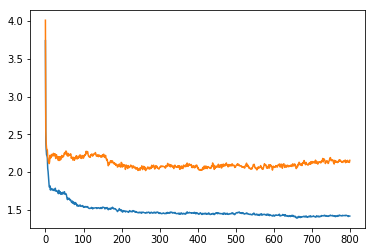

In [189]:
gaussian_train_rmse_traj = np.array(list(map(train_rmse, gaussian_prediction_traj)))
gaussian_test_rmse_traj = np.array(list(map(test_rmse, gaussian_prediction_traj)))

plt.plot(gaussian_train_rmse_traj)
plt.plot(gaussian_test_rmse_traj)

In [190]:
gaussian_trees[-1].get_radii()

array([0.19636951, 0.05873303, 0.18626731, 0.18259716, 0.11016162,
       0.26413733, 0.22988651, 0.25650028, 0.13535795, 0.18722107,
       0.25054414, 0.17566919, 0.18656397, 0.15409356, 0.27172767,
       0.26561169, 0.18436951, 0.23144501, 0.23119033, 0.20742235,
       0.20459888, 0.18863809, 0.1694157 , 0.20575973])

In [191]:
len(set(gaussian_test_rmse_traj))

800

# Make a movie of the atom-typing scheme!

In [50]:
list(zip(discrete_trees[0], np.bincount(np.hstack(typings[0]))))

[('*', 0),
 ('[#1]', 5948),
 ('[#6]', 4123),
 ('[#7]', 220),
 ('[#8]', 630),
 ('[#9]', 101),
 ('[#15]', 15),
 ('[#16]', 52),
 ('[#17]', 303),
 ('[#35]', 29),
 ('[#53]', 12)]

In [51]:
student_t_trees[-1]

*                   (r = 0.98 Å, s = 0.82)
|-[#1]              (r = 0.62 Å, s = 0.77)
|-[#6]              (r = 1.79 Å, s = 0.93)
  |-[#6&X3]         (r = 1.90 Å, s = 0.85)
|-[#7]              (r = 1.95 Å, s = 0.88)
  |-[#7&A]          (r = 1.86 Å, s = 0.87)
|-[#8]              (r = 1.10 Å, s = 0.92)
  |-[#8&+0]         (r = 1.63 Å, s = 0.89)
    |-[#8&+0&H0]    (r = 1.93 Å, s = 0.96)
|-[#9]              (r = 2.49 Å, s = 0.61)
|-[#15]             (r = 2.15 Å, s = 0.64)
|-[#16]             (r = 2.82 Å, s = 0.66)
  |-[#16&X2]        (r = 2.02 Å, s = 0.96)
|-[#17]             (r = 1.51 Å, s = 1.46)
|-[#35]             (r = 1.66 Å, s = 1.19)
|-[#53]             (r = 2.48 Å, s = 0.60)

In [192]:
def expt_unc_contained(preds, i, desired_coverage=0.95):
    alpha = 100 * ((1 - desired_coverage) / 2)
    upper, lower = norm.cdf(np.percentile(preds, q=[100 - alpha, alpha]), loc=expt_means[i], scale=expt_uncs[i])
    return upper - lower

In [193]:
gaussian_prediction_traj = np.array(gaussian_prediction_traj)

In [194]:
from scipy.stats import norm
desired_coverages = np.linspace(0,1)
actual_coverages = np.vstack([np.array([expt_unc_contained(gaussian_prediction_traj[:,i], i, desired_coverage=p) for i in range(len(mols))]) for p in desired_coverages])

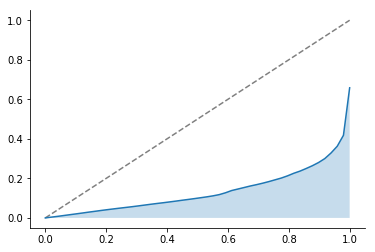

In [195]:
from bayes_implicit_solvent.utils import remove_top_right_spines
ax = plt.subplot(1,1,1)
remove_top_right_spines(ax)
plt.plot(desired_coverages, desired_coverages, c='grey', linestyle='--')

plt.plot(desired_coverages, np.mean(actual_coverages, 1), label='gaussian')
plt.fill_between(desired_coverages, np.mean(actual_coverages, 1), alpha=0.25)

In [196]:
np.trapz(np.mean(actual_coverages, 1), desired_coverages)

0.1330546091247614

In [206]:
student_t_prediction_traj = []
for i in tqdm(range(len(student_t_trees))[::5]):
    student_t_prediction_traj.append(get_predictions(
        student_t_thetas[i],
        t_typings[tuple(student_t_trees[i].ordered_nodes)]))

100%|██████████| 800/800 [09:27<00:00,  1.40it/s]


In [208]:
student_t_prediction_traj = np.array(student_t_prediction_traj)

In [209]:
t_actual_coverages = np.vstack([np.array([expt_unc_contained(student_t_prediction_traj[:,i], i, desired_coverage=p) for i in range(len(mols))]) for p in desired_coverages])

(0, 1)

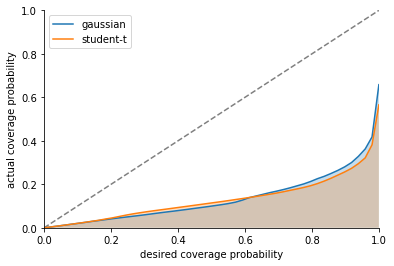

In [210]:
ax = plt.subplot(1,1,1)
remove_top_right_spines(ax)
plt.plot(desired_coverages, desired_coverages, c='grey', linestyle='--')

plt.plot(desired_coverages, np.mean(actual_coverages, 1), label='gaussian')
plt.fill_between(desired_coverages, np.mean(actual_coverages, 1), alpha=0.25)

plt.plot(desired_coverages, np.mean(t_actual_coverages, 1), label='student-t')
plt.fill_between(desired_coverages, np.mean(t_actual_coverages, 1), alpha=0.25)

plt.legend()
plt.xlabel('desired coverage probability')
plt.ylabel('actual coverage probability')
plt.xlim(0,1)
plt.ylim(0,1)

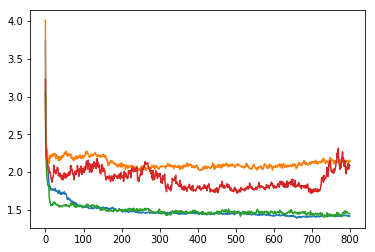

In [211]:
gaussian_train_rmse_traj = np.array(list(map(train_rmse, gaussian_prediction_traj)))
gaussian_test_rmse_traj = np.array(list(map(test_rmse, gaussian_prediction_traj)))

t_train_rmse_traj = np.array(list(map(train_rmse, student_t_prediction_traj)))
t_test_rmse_traj = np.array(list(map(test_rmse, student_t_prediction_traj)))

plt.plot(gaussian_train_rmse_traj)
plt.plot(gaussian_test_rmse_traj)

plt.plot(t_train_rmse_traj)
plt.plot(t_test_rmse_traj)

In [212]:
t_test_rmse_traj[-1]

2.089022410070848

In [216]:
train_rmse(np.mean(student_t_prediction_traj[10:], 0))

1.4347409079761044

In [218]:
train_rmse(np.mean(gaussian_prediction_traj[10:], 0))

1.4278416872719142

In [215]:
test_rmse(np.mean(student_t_prediction_traj[10:], 0))

1.847731934494097

In [217]:
test_rmse(np.mean(gaussian_prediction_traj[10:], 0))

2.0678690921969354